# Sentiment Analysis of Amazon Reviews

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

## 1. Setup and NLTK (natural language toolkit)

In [2]:
data = pd.read_csv('amazon_reviews.csv')

In [3]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(data.shape)

(568454, 10)


In [5]:
# let us take a sample

df = data.sample(500)

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
143295,143296,B0007A0AQM,A17IGFR37ISWPL,"L. Smith ""Love to run""",9,10,5,1268870400,Great for training!,Surprised of the bad reviews because of the sm...
262447,262448,B002B9HC6I,A8R9QNGTLV2LT,Justin,1,1,5,1258416000,good sauce,I really enjoy this sauce. It has a great heat...
233686,233687,B0044CZ6UO,ANYD5OP35KI3A,mommy of twins,0,0,4,1316995200,not for all kids,This particular flavor got mixed reviews from ...
88855,88856,B000FZRYE0,A2KCFKGL40GRNF,Marie V. Poinan,0,0,5,1342915200,Great value noodles,"Well worth the money, especially on auto-ship...."
411426,411427,B000G1EO1Y,A3IYSIAKYOMKTO,Renter,0,0,5,1292371200,Your Burps Will Taste Delicious,I was expecting this soup to be more like Goya...


### Quick EDA

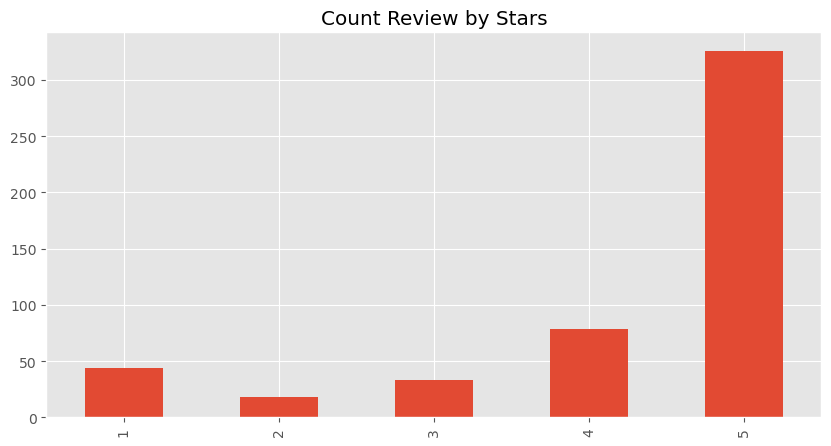

In [7]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', 
                                             title='Count Review by Stars',
                                             figsize=(10,5))
ax.set_label('Review Stars')
plt.show()

# biased towards positive reviews

### Basic NLTK

In [8]:
example = df['Text'].iloc[50]
print(example)

the tea is great. i tried the peach one a pf change and loved it so decided to try other ones. the earl grey one was kind of strong but all the rest was just what i like in  a tea.


In [9]:
import nltk
nltk.download('punkt')

# tokenizing results but not perfect. certainly better thna splitting
tokens = nltk.word_tokenize(example)
tokens[:10]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\geopa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['the', 'tea', 'is', 'great', '.', 'i', 'tried', 'the', 'peach', 'one']

In [10]:
nltk.download('averaged_perceptron_tagger')

# find the part of speech for each of these words
tagged = nltk.pos_tag(tokens)
tagged[:10]

# check out this: https://cheatography.com/deacondesperado/cheat-sheets/nltk-part-of-speech-tags/
# for reference

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\geopa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('the', 'DT'),
 ('tea', 'NN'),
 ('is', 'VBZ'),
 ('great', 'JJ'),
 ('.', '.'),
 ('i', 'NN'),
 ('tried', 'VBD'),
 ('the', 'DT'),
 ('peach', 'NN'),
 ('one', 'CD')]

In [11]:
nltk.download('maxent_ne_chunker')
nltk.download('words')


# groups tokens into chunks of text
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\geopa\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\geopa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


(S
  the/DT
  tea/NN
  is/VBZ
  great/JJ
  ./.
  i/NN
  tried/VBD
  the/DT
  peach/NN
  one/CD
  a/DT
  pf/NN
  change/NN
  and/CC
  loved/VBD
  it/PRP
  so/RB
  decided/VBD
  to/TO
  try/VB
  other/JJ
  ones/NNS
  ./.
  the/DT
  earl/NN
  grey/VBD
  one/CD
  was/VBD
  kind/NN
  of/IN
  strong/JJ
  but/CC
  all/PDT
  the/DT
  rest/NN
  was/VBD
  just/RB
  what/WP
  i/VBP
  like/VBP
  in/IN
  a/DT
  tea/NN
  ./.)


### VADER - Valence Aware Dictionary and sEntiment Reasoner

### 1. Sentiment Analysis
> 1. Stop words are removed (and, the, a, it, ...)
> 2. -1, 0, 1 scores

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\geopa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [13]:
sia.polarity_scores('I am so happy!') # values are (-1,1)

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [14]:
sia.polarity_scores('This movie sucks!') # values are (-1,1)

{'neg': 0.583, 'neu': 0.417, 'pos': 0.0, 'compound': -0.4199}

In [15]:
sia.polarity_scores("I really don't know man!") # values are (-1,1)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [16]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.8539}

In [17]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [18]:
vaders = pd.DataFrame(res).T # transpose in dataframes
vaders = vaders.reset_index().rename(columns={'index' : 'Id'})
vaders = vaders.merge(df, how='left')

In [19]:
# now we have sentiment score and metadata
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,143296,0.071,0.650,0.279,0.9898,B0007A0AQM,A17IGFR37ISWPL,"L. Smith ""Love to run""",9,10,5,1268870400,Great for training!,Surprised of the bad reviews because of the sm...
1,262448,0.000,0.792,0.208,0.8487,B002B9HC6I,A8R9QNGTLV2LT,Justin,1,1,5,1258416000,good sauce,I really enjoy this sauce. It has a great heat...
2,233687,0.144,0.722,0.134,-0.0772,B0044CZ6UO,ANYD5OP35KI3A,mommy of twins,0,0,4,1316995200,not for all kids,This particular flavor got mixed reviews from ...
3,88856,0.000,0.441,0.559,0.9498,B000FZRYE0,A2KCFKGL40GRNF,Marie V. Poinan,0,0,5,1342915200,Great value noodles,"Well worth the money, especially on auto-ship...."
4,411427,0.000,0.787,0.213,0.9828,B000G1EO1Y,A3IYSIAKYOMKTO,Renter,0,0,5,1292371200,Your Burps Will Taste Delicious,I was expecting this soup to be more like Goya...


### 2. Plot VADER results

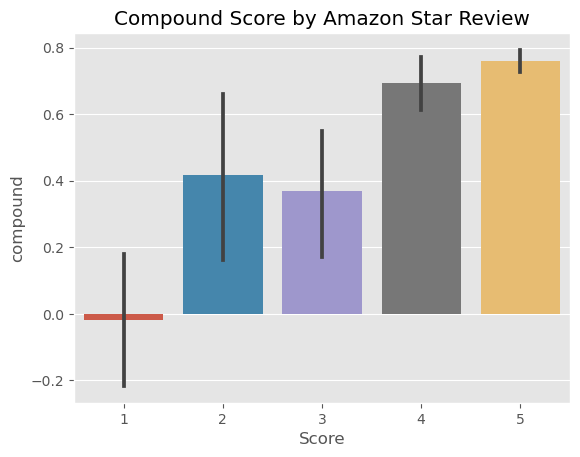

In [20]:
# let assume if 5 score means more positive than 1 
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show()
# validates what we assumed

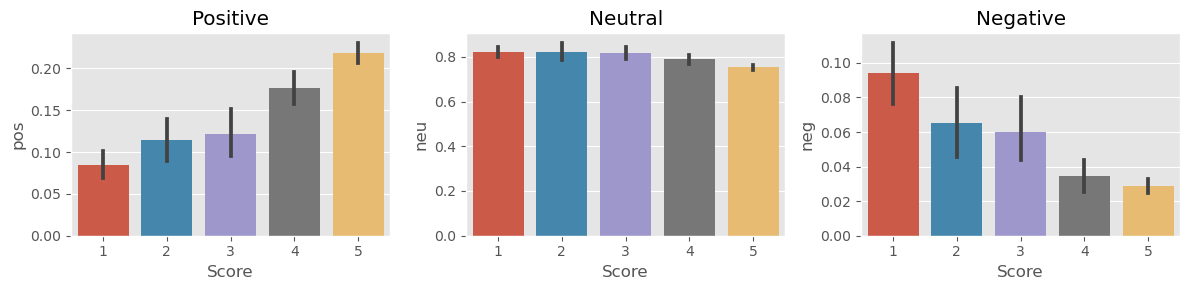

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12,3))
ax = sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
ax = sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
ax = sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

### 3. Roberta Pretrained Model

> Model trained of a large corpus of data
> Accounts for words, but also context

In [22]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [80]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [24]:
# VADER results on example 
print(example)
sia.polarity_scores(example)

the tea is great. i tried the peach one a pf change and loved it so decided to try other ones. the earl grey one was kind of strong but all the rest was just what i like in  a tea.


{'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'compound': 0.8539}

In [82]:
import numpy 
import torch

# Run for Roberta Model 
encoded_text = tokenizer(example, return_tensors = 'pt')
output = model(**encoded_text)
output # <- tensor
scores = output[0][0].detach()
score = torch.softmax(torch.tensor(scores), dim=0)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}

C:\Users\geopa\AppData\Local\Temp\ipykernel_19044\1631170620.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  score = torch.softmax(torch.tensor(scores), dim=0)


In [27]:
scores_dict

{'roberta_neg': tensor(-2.6377),
 'roberta_neu': tensor(-0.5002),
 'roberta_pos': tensor(3.9560)}

In [55]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors = 'pt')
    output = model(**encoded_text)
    output # <- tensor
    scores = output[0][0].detach()
    score = torch.softmax(scores, dim=0)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [57]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value    
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result, **roberta_result}

        res[myid] = both
    
    except RuntimeError:
        print(f"Broke for id {myid}")
    
    

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 28426
Broke for id 98042
Broke for id 125250
Broke for id 385846


In [52]:
# we can lower the amount size of thsoe to make it work
# it was a bit slow but because it was running on cpu, which we can run on a gpu as well

{'neg': 0.0,
 'neu': 0.769,
 'pos': 0.231,
 'compound': 0.6597,
 'roberta_neg': tensor(-2.9392),
 'roberta_neu': tensor(-0.0380),
 'roberta_pos': tensor(3.4526)}

In [58]:
results_df = pd.DataFrame(res).T # transpose in dataframes
results_df = results_df.reset_index().rename(columns={'index' : 'Id'})
results_df = results_df.merge(df, how='left')

In [60]:
results_df.head()

,Id,neg,neu,pos,compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,143296,0.071,0.65,0.279,0.9898,tensor(-1.6121),tensor(-0.3770),tensor(2.6006),B0007A0AQM,A17IGFR37ISWPL,"L. Smith ""Love to run""",9,10,5,1268870400,Great for training!,Surprised of the bad reviews because of the sm...
1,262448,0.0,0.792,0.208,0.8487,tensor(-2.4749),tensor(-0.5367),tensor(3.7491),B002B9HC6I,A8R9QNGTLV2LT,Justin,1,1,5,1258416000,good sauce,I really enjoy this sauce. It has a great heat...
2,233687,0.144,0.722,0.134,-0.0772,tensor(0.5837),tensor(0.3949),tensor(-0.9578),B0044CZ6UO,ANYD5OP35KI3A,mommy of twins,0,0,4,1316995200,not for all kids,This particular flavor got mixed reviews from ...
3,88856,0.0,0.441,0.559,0.9498,tensor(-2.6191),tensor(-0.5839),tensor(3.9022),B000FZRYE0,A2KCFKGL40GRNF,Marie V. Poinan,0,0,5,1342915200,Great value noodles,"Well worth the money, especially on auto-ship...."
4,411427,0.0,0.787,0.213,0.9828,tensor(-1.9126),tensor(0.0272),tensor(2.2634),B000G1EO1Y,A3IYSIAKYOMKTO,Renter,0,0,5,1292371200,Your Burps Will Taste Delicious,I was expecting this soup to be more like Goya...


## 3. Compare scores between models

In [61]:
results_df.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\numpy\lib\arraysetops.py:608: RuntimeWarning: invalid value encountered in equal
  mask |= (ar1 == a)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\numpy\lib\arraysetops.py:608: RuntimeWarning: invalid value encountered in equal
  mask |= (ar1 == a)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\numpy\lib\arraysetops.py:608: RuntimeWarning: invalid value encountered in equal
  mask |= (ar1 == a)
C:\Users\geopa\.conda\envs\GSPT\lib\site-packages\numpy\lib\arraysetops.py:608: RuntimeWarning: invalid value encountered in equal
  mask |= (ar1 == a)


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

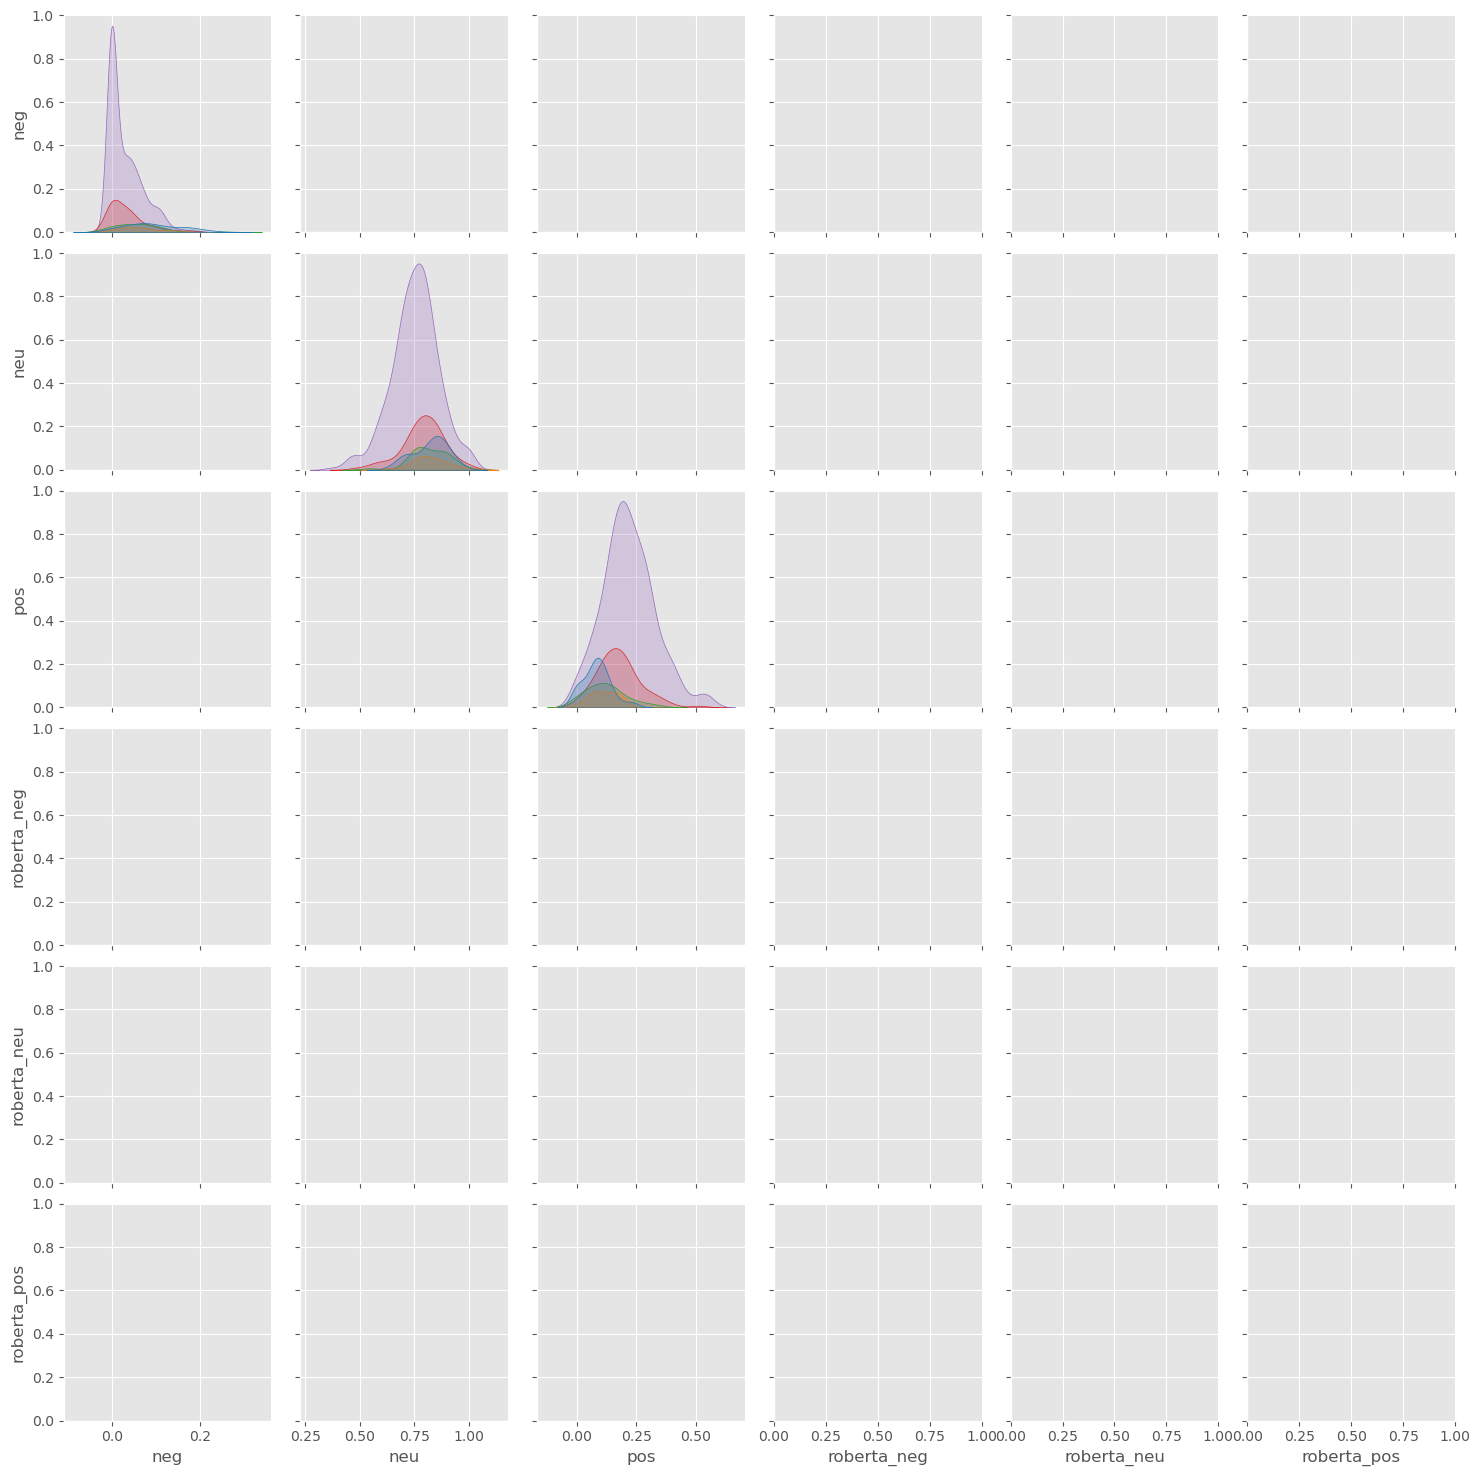

In [64]:
sns.pairplot(data=results_df, 
             vars=['neg', 'neu', 'pos', 'roberta_neg', 'roberta_neu',
                   'roberta_pos'], 
             hue='Score', 
             palette='tab10')
plt.show()

## 4. Review Examples

Positive sentiment 1-star review

In [71]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)["Text"].values[0]
# subtle irony is a big difficult to detect

"I'm a big fan of the Wolfgang Puck Chicken and Egg Noodle soup so I decided to try this. There were about 7 tiny pieces of dumpling, 2 tiny pieces of chicken, and maybe 12 tiny pieces of carrots. Expect to be very hungry after eating a can of this."

In [74]:
results_df.query('Score == 1').sort_values('pos', ascending=False)["Text"].values[0]

'Kettle chips now look, feel and taste like Lays.  These chips used to be my favorite when it was crinkle cut and hefty.  Now, no longer my favorite.'

Negative sentiment 5 star review

In [76]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)["Text"].values[0]

'I bought these for myself. Running around mommy and working I don\'t eat because I don\'t have time. Then my steam runs out and I think "why the hell didn\'t I eat?" My mom is a type 1 diabetic and she found these and now she can\'t keep her hands off of them. She said she doesn\'t feel hungry as quick. Now my husband has found them. Geez! I have had one package that was a little more gooey but most of the time they are drier tasting. Personally I don\'t want it to be gooey. I am on a subscription of these through Amazon and I need to increase the amount. My kids haven\'t tried them...I am sure they are next except they are picky eaters.'

In [77]:
results_df.query('Score == 5').sort_values('neg', ascending=False)["Text"].values[0]

'Our boxer had horrible skin alleges and threw up all other foods starting about age 7.  Since changing she has no allergy medications and only has stomach issues when she eats food my kids drop!  I highly recommend this!'

## 5. Extra: The Transformers Pipeline

In [79]:
from transformers import pipeline

sent_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
WARNING[XFORMERS]: xFormers can't load C++/CUDA extensions. xFormers was built for:
    PyTorch 2.0.1+cu118 with CUDA 1108 (you have 2.0.1+cpu)
    Python  3.10.11 (you have 3.10.4)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details
